*Contenuti*
===
- [La libreria Pandas](#La-libreria-Pandas)
    - [Il dataset *nyc-rolling-sales*](#Il-dataset-nyc-rolling-sales)

La libreria Pandas
===

*Pandas* è la libreria di Python per la visualizzazione, manipolazione e analisi dei dati grezzi.

Ispirata ai *dataframe* del linguaggio *R*, è relativamente nuova per Python. Mette a disposizione centinaia di funzioni, anche grafiche, e richiede un po' di sforzo iniziale. Con questo strumento, però, possiamo fare *tutto* senza uscire dal nostro notebook jupyter.

In rete trovate svariate introduzioni all'utilizzo della libreria:

- https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
- https://www.pythonforengineers.com/introduction-to-pandas/
- https://www.codecademy.com/learn/data-processing-pandas/modules/dspath-intro-pandas


In questo notebook vediamo alcuni esempi di utilizzo che sfruttiamo per ripulire un dataset realistico, in modo da poterci fare machine learning (con gli strumenti visti nelle Lezioni 6 e 7).

Come al solito, importiamo la libreria e diamogli un nome convenzionale.

In [14]:
import pandas as pd

pd.__version__

'0.24.2'

Il dataset *nyc-rolling-sales*
---

Finora abbiamo ottenuto dati:

- generandoli casualmente
- importandoli dai toy dataset di sklearn.

Questi erano già in forma numerica, pronti per fare machine learning. Più realisticamente, troviamo dati su file .csv in formato misto.

Quello che useremo in questo notebook è preso da *Kaggle*. Kaggle è un sito che ospita competizioni di machine learning, e un hub per la data science. E' utilissimo per fare pratica: oltre a molti dataset realistici, https://www.kaggle.com/datasets, sono disponibili centinaia di notebook come questo (chiamati *kernel*) con esempi pratici.

In particolare, il dataset *nyc-rolling-sales* contiene le informazioni di tutti gli edifici e le unità abitative vendute a New York negli ultimi 12 mesi. In questo caso, il periodo considerato è 9/16 - 9/17:

https://www.kaggle.com/new-york-city/nyc-property-sales.

Qui trovate un glossario delle feature: https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

In [3]:
df = pd.read_csv('data/nyc_rolling_sales.csv')

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,1633,6440,1900,2,C2,2017-07-19 00:00:00,6625000
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,2272,6794,1913,2,C4,2016-09-23 00:00:00,3936272
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,2369,4615,1900,2,C2,2016-11-17 00:00:00,8000000
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,1750,4226,1920,2,C4,2016-09-23 00:00:00,3192840
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,4489,18523,1920,2,D9,2016-11-07 00:00:00,16232000


In [4]:
df.shape

(29334, 19)

In [6]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'SALE PRICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29334 entries, 0 to 29333
Data columns (total 19 columns):
BOROUGH                           29334 non-null object
NEIGHBORHOOD                      29334 non-null object
BUILDING CLASS                    29334 non-null object
TAX CLASS AT PRESENT              29334 non-null object
BLOCK                             29334 non-null int64
LOT                               29334 non-null int64
BUILDING CLASS AT PRESENT         29334 non-null object
ADDRESS                           29334 non-null object
APARTMENT NUMBER                  29334 non-null object
ZIP CODE                          29334 non-null int64
RESIDENTIAL UNITS                 29334 non-null int64
COMMERCIAL UNITS                  29334 non-null int64
LAND SQUARE FEET                  29334 non-null int64
GROSS SQUARE FEET                 29334 non-null int64
YEAR BUILT                        29334 non-null int64
TAX CLASS                         29334 non-null int64
BUIL

In [9]:
df['NEIGHBORHOOD'].head(20)

0     ALPHABET CITY
1     ALPHABET CITY
2     ALPHABET CITY
3     ALPHABET CITY
4     ALPHABET CITY
5     ALPHABET CITY
6     ALPHABET CITY
7     ALPHABET CITY
8     ALPHABET CITY
9     ALPHABET CITY
10    ALPHABET CITY
11    ALPHABET CITY
12          CHELSEA
13          CHELSEA
14          CHELSEA
15          CHELSEA
16          CHELSEA
17          CHELSEA
18          CHELSEA
19          CHELSEA
Name: NEIGHBORHOOD, dtype: object

In [10]:
df[['SALE DATE', 'NEIGHBORHOOD', 'SALE PRICE']].head(20)

,SALE DATE,NEIGHBORHOOD,SALE PRICE
0,2017-07-19 00:00:00,ALPHABET CITY,6625000
1,2016-09-23 00:00:00,ALPHABET CITY,3936272
2,2016-11-17 00:00:00,ALPHABET CITY,8000000
3,2016-09-23 00:00:00,ALPHABET CITY,3192840
4,2016-11-07 00:00:00,ALPHABET CITY,16232000
5,2016-10-17 00:00:00,ALPHABET CITY,10350000
6,2017-06-21 00:00:00,ALPHABET CITY,11900000
7,2016-10-13 00:00:00,ALPHABET CITY,28000000
8,2016-11-15 00:00:00,ALPHABET CITY,3300000
9,2017-01-30 00:00:00,ALPHABET CITY,7215000


In [179]:
df['SALE PRICE'].groupby(df['BOROUGH']).mean()

BOROUGH
BRONX            7.062025e+05
BROOKLYN         1.129855e+06
MANHATTAN        4.334480e+06
QUEENS           7.237156e+05
STATEN ISLAND    5.179431e+05
Name: SALE PRICE, dtype: float64

In [177]:
df['SALE PRICE'].groupby(df['BOROUGH']).min()

BOROUGH
BRONX            1
BROOKLYN         1
MANHATTAN        1
QUEENS           1
STATEN ISLAND    1
Name: SALE PRICE, dtype: int64

In [180]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df = df.set_index('SALE DATE', drop=True)

In [187]:
grouper = pd.Grouper(level='SALE DATE', freq='15d')
df['SALE PRICE'].groupby(grouper).mean()

SALE DATE
2016-09-01    851271.645244
2016-09-16    928348.543144
2016-10-01    823684.128643
2016-10-16    809065.521888
2016-10-31    831371.945455
2016-11-15    848214.110204
2016-11-30    856729.024908
2016-12-15    995040.702586
2016-12-30    904295.495108
2017-01-14    810984.841418
2017-01-29    916665.802208
2017-02-13    878464.148490
2017-02-28    746626.152878
2017-03-15    823906.835855
2017-03-30    867795.073506
2017-04-14    817190.491987
2017-04-29    899754.872624
2017-05-14    906857.268486
2017-05-29    874236.799267
2017-06-13    885527.277738
2017-06-28    923077.003469
2017-07-13    964154.137134
2017-07-28    981022.417962
2017-08-12    957996.879739
2017-08-27    987409.445055
Freq: 15D, Name: SALE PRICE, dtype: float64

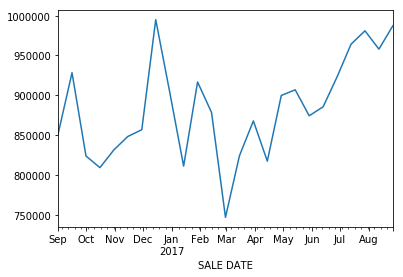

In [188]:
price_by_15days = df['SALE PRICE'].groupby(grouper).mean()

price_by_15days.plot()

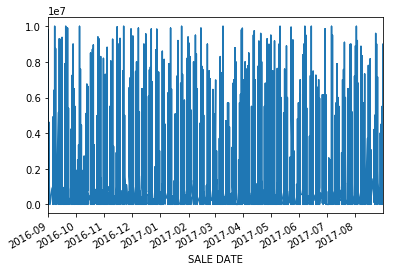

In [175]:
(df['SALE PRICE']).plot()

In [ ]:
df.head()

In [112]:
df = df.drop(columns=['ADDRESS', 'ZIP CODE'])

# df.head()

In [100]:
df.shape

(28946, 10)

In [135]:
df = pd.get_dummies(df, prefix=['BOR', 'BC', 'TC'], columns=['BOROUGH', 'BUILDING CLASS', 'TAX CLASS'])

In [136]:
df.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOR_BRONX,BOR_BROOKLYN,BOR_MANHATTAN,BOR_QUEENS,...,BC_RENTALS - 4-10 UNIT,BC_RENTALS - ELEVATOR APARTMENTS,BC_RENTALS - WALKUP APARTMENTS,BC_STORE BUILDINGS,BC_THREE FAMILY DWELLINGS,BC_TWO FAMILY DWELLINGS,BC_WAREHOUSES,TC_1,TC_2,TC_4
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-19,5,0,1633,6440,1900,6625000,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2016-09-23,10,0,2272,6794,1913,3936272,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2016-11-17,6,0,2369,4615,1900,8000000,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2016-09-23,8,0,1750,4226,1920,3192840,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2016-11-15,3,1,1520,3360,1910,3300000,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [140]:
# y = df.pop('SALE PRICE')
# X = df.values
X.shape, y.shape

((27713, 24), (27713,))

In [144]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

X, y = shuffle(X, y, random_state=0)
X = MinMaxScaler().fit_transform(X)

/home/frensis/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [154]:
X_tr = X[:15_000]
X_val = X[15_000:20_000]
X_test = X[20_000:]

y_tr = y[:15_000]
y_val = y[15_000:20_000]
y_test = y[20_000:]



In [113]:
df['SALE PRICE'].describe()

count    2.848400e+04
mean     8.804945e+05
std      1.068849e+06
min      1.000000e+00
25%      4.196660e+05
50%      6.099655e+05
75%      9.250000e+05
max      1.000000e+07
Name: SALE PRICE, dtype: float64

In [120]:
df['SALE PRICE'] >= 1000

In [124]:
sum([True, True, False, True])

3

In [127]:
sum(df['SALE PRICE'] < 1000)

0

In [121]:
df = df[df['SALE PRICE'] >= 1000]

In [122]:
df['SALE PRICE'].describe()

count    2.771300e+04
mean     9.049892e+05
std      1.073338e+06
min      1.000000e+03
25%      4.300000e+05
50%      6.250000e+05
75%      9.400000e+05
max      1.000000e+07
Name: SALE PRICE, dtype: float64

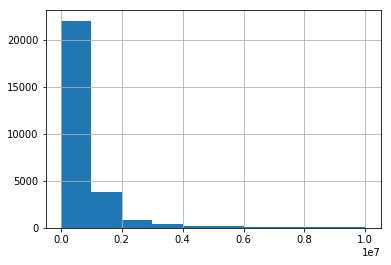

In [129]:
df['SALE PRICE'].hist()

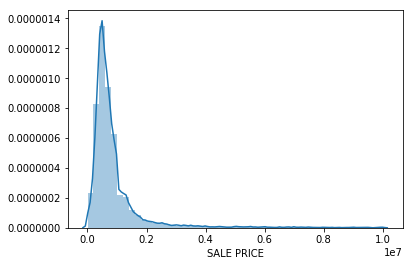

In [131]:
import seaborn as sns

sns.distplot(df['SALE PRICE'])

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>